In [1]:
from pydgrid import grid
from pydgrid.pydgrid import phasor2time, pq
from pydgrid.pf import pf_eval,time_serie
from pydgrid.electric import bess_vsc, bess_vsc_eval
from pydgrid.simu import simu, f_eval, ini_eval, run_eval
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
3    
data = {
"lines":[
		{"bus_j": "B1",  "bus_k": "B2",  "code": "UG1", "m": 50.0},
		{"bus_j": "B2",  "bus_k": "B3",  "code": "UG1", "m": 100.0}
		],
"buses":[
		{"bus": "B1",  "pos_x":  0,  "pos_y": 0, "units": "m", "U_kV":0.4},
		{"bus": "B2",  "pos_x":100,  "pos_y": 0, "units": "m", "U_kV":0.4},
		{"bus": "B3",  "pos_x":200,  "pos_y": 0, "units": "m", "U_kV":0.4}
		],
"grid_formers":[
		{"bus": "B1",
			"bus_nodes": [1, 2, 3, 4], "deg": [0, -120, -240, 0.0],
			"kV": [0.23, 0.23, 0.23, 0.0], "code":"bess_100kVA_300kWh"},
		{"bus": "B3",
			"bus_nodes": [1, 2, 3, 4], "deg": [0, -120, -240, 0.0],
			"kV": [0.23, 0.23, 0.23, 0.0], "code":"bess_100kVA_300kWh"},
		],
"grid_feeders":[{ "bus": "B2","bus_nodes": [1, 2, 3, 4],
					"kW": [-20.0, -20.0, -20.0], "kvar": [30.0,30.0,30.0],
					"kA": [0.0,0.0,0.0], "phi_deg":[-90, -90, -90]}
				],
"shunts":[
		{"bus": "B1" , "R": 1.0, "X": 0.0, "bus_nodes": [4,0]},
		{"bus": "B3" , "R": 1.0, "X": 0.0, "bus_nodes": [4,0]}
		],
"bess_vsc":{
            "bess_100kVA_300kWh":{"ctrl_mode":3, "s_n_kVA":100.0, "V_dc":800.0, 
                     "soc_max_kWh":300.0, "soc_ini_kWh":100.0, 
                     "source_mode":"grid_former", "L":1.0e-3, "R":1.0,
                     "R_0":0.1, "R_1":0.2, "C_1":100.0,
                     "K_v":0.02, "K_ang":0.02,"T_v":2, "T_ang":2 }           }
}

grid_1 = grid()
grid_1.read(data)  # Load data
simu_1 = simu(data, grid_1) 

grid_1.pf()  # solve power flow

t = 0.0
ini_eval(t,
         grid_1.params_pf,
         simu_1.params_simu,
         simu_1.params_bess_vsc)

T,V_nodes,I_nodes,X = run_eval(10,
                               grid_1.params_pf,
                               simu_1.params_simu,
                               simu_1.params_bess_vsc)

grid_1.get_v()      # post process voltages
grid_1.get_i()      # post process currents 

<IPython.core.display.Javascript object>


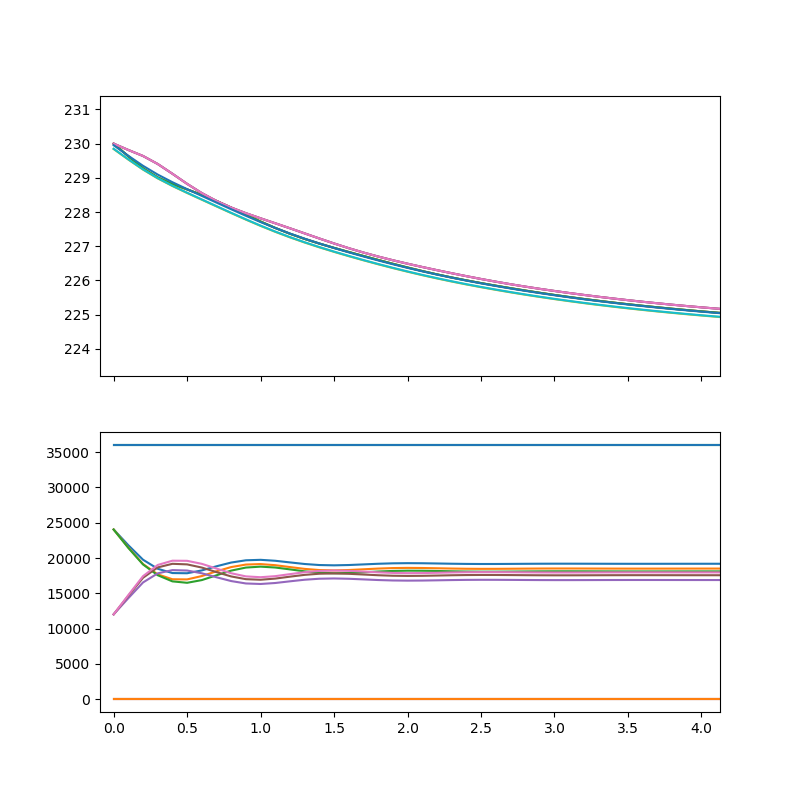

In [3]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 8), sharex = True)

x = np.linspace(0,12,100)

S = V_nodes*np.conj(I_nodes)
axes[0].plot(T, abs(V_nodes))
#axes[1].plot(T, S.real)
#axes[1].plot(T, S.imag)
axes[1].plot(T, np.abs(S))

#axes[0].set_ylabel('Y_1')
#axes[1].set_ylabel('Y_2')

#plt.xticks(rotation=30)
#axes[0].set_ylabel('$\sf C_p$')
#axes[0].set_xlabel('$\sf \lambda$')
#axes[0].set_ylim([227,231])

#fig.savefig('out.svg', bbox_inches='tight')

In [4]:
abs(V_nodes[-1,:])

array([  2.24412991e+02,   2.24412991e+02,   2.24412991e+02,
         0.00000000e+00,   2.24531447e+02,   2.24531447e+02,
         2.24531447e+02,   0.00000000e+00,   2.24290679e+02,
         2.24298827e+02,   2.24404703e+02,   1.18737242e-01])